Imports

In [1]:
# TensorFlow y Keras
import tensorflow as tf
from tensorflow import keras

# Librerías auxiliares
import numpy as np
import matplotlib.pyplot as plt

---
## Importación de set de datos MNIST

In [2]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [16]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

## Exploración del set de datos

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

## Preprocesamiento de datos

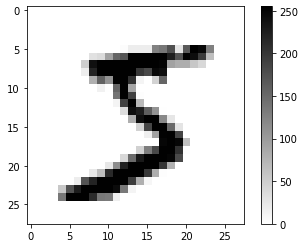

In [11]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

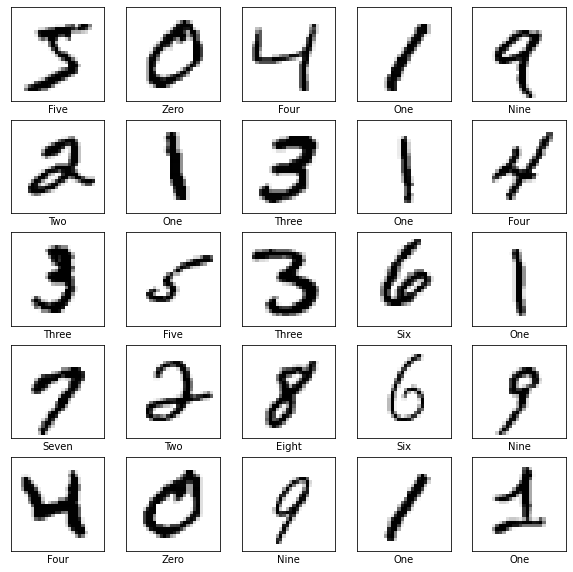

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construcción del Modelo

### Configuración de Capas

In [24]:
model = keras.Sequential([
    # Primera Capa
    keras.layers.Flatten(input_shape=(28, 28)),
    # Capas ocultas conectadas con la capa superior.
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compilación del Modelo

In [25]:
model.compile(  optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

### Entrenamiento del Modelo

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.3050 - accuracy: 0.9133
Epoch 2/10
1875/1875 [==============================] - 2s 834us/step - loss: 0.1504 - accuracy: 0.9563
Epoch 3/10
1875/1875 [==============================] - 2s 850us/step - loss: 0.1097 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.0854 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 2s 895us/step - loss: 0.0704 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.0593 - accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 2s 854us/step - loss: 0.0509 - accuracy: 0.9846
Epoch 8/10
1875/1875 [==============================] - 2s 875us/step - loss: 0.0448 - accuracy: 0.9861
Epoch 9/10
1875/1875 [==============================] - 2s 853us/step - loss: 0.0391 - accuracy: 0.9878
Epoch 10/10
1875/1875 [==============================] - 2s 844u

## Evaluar Exactitud

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest Accuracy:", test_acc)

313/313 - 0s - loss: 0.0824 - accuracy: 0.9754 - 303ms/epoch - 969us/step

Test Accuracy: 0.9753999710083008


### Predicciones

In [28]:
predictions = model.predict(test_images)

In [29]:
predictions[0]

array([7.4741968e-07, 7.9838125e-10, 1.4146918e-05, 1.3209556e-04,
       1.9176191e-12, 2.8157492e-08, 8.9983741e-12, 9.9979395e-01,
       3.1261679e-05, 2.7852457e-05], dtype=float32)

In [30]:
np.argmax(predictions[0])

7

In [31]:
test_labels[0]

7

In [32]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

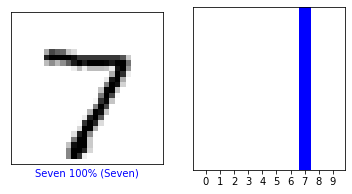

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

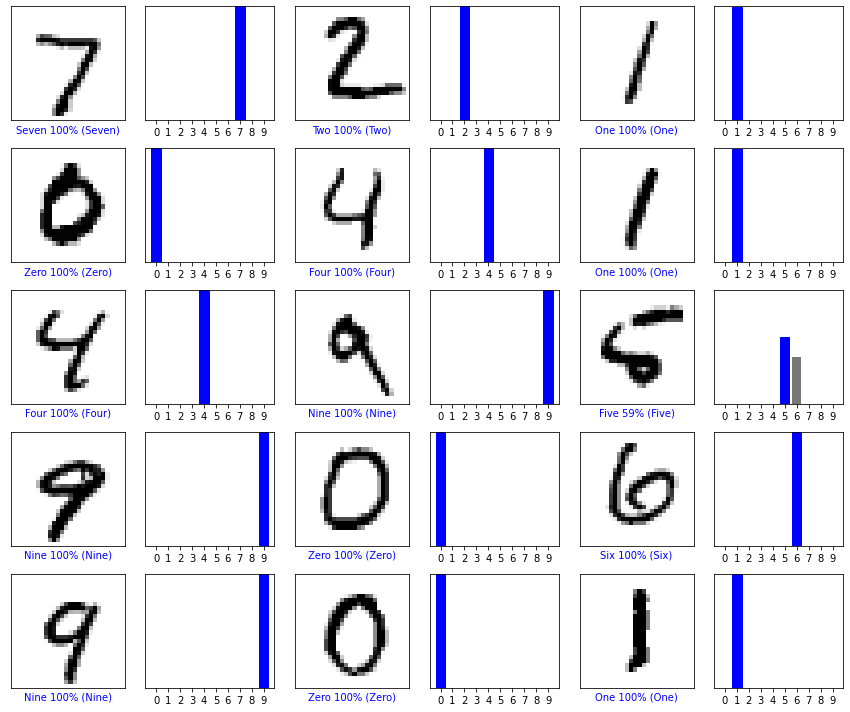

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Predicción sobre una imagen

In [40]:
img = test_images[8]
img.shape

(28, 28)

In [41]:
img = np.expand_dims(img, 0)
img.shape

(1, 28, 28)

In [42]:
predictions_single = model.predict(img)
predictions_single

array([[7.3426967e-09, 1.2214230e-09, 3.0955302e-06, 1.5356873e-10,
        7.8408613e-07, 5.8823830e-01, 4.1121104e-01, 7.4848558e-11,
        5.4671912e-04, 6.1342750e-11]], dtype=float32)

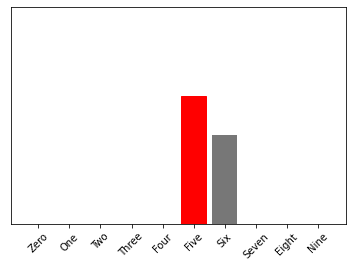

In [43]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [44]:
np.argmax(predictions_single[0])

5